In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
matplotlib.rcParams['figure.figsize'] = 12,6
matplotlib.rcParams['font.size'] = 12.0


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()
# no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Explanatory Data Analysis

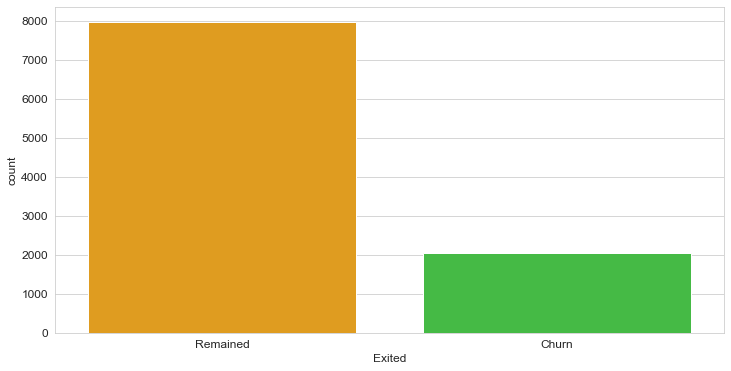

In [6]:
sns.countplot(x='Exited', data=df, palette=['orange', 'limegreen'])
plt.xticks([0,1],['Remained', 'Churn']);

In [7]:
remained = df[df['Exited'] == 0]
churn = df[df['Exited'] == 1]

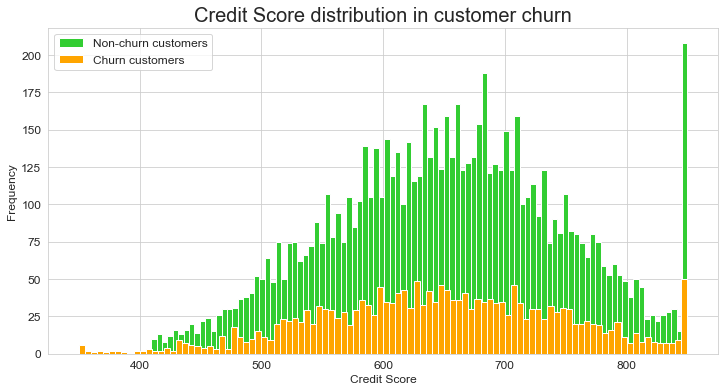

In [8]:

plt.hist(remained['CreditScore'], bins=100, color='limegreen', label='Non-churn customers')
plt.hist(churn['CreditScore'], bins=100, color='orange', label='Churn customers')
plt.title('Credit Score distribution in customer churn', fontsize=20)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.legend();


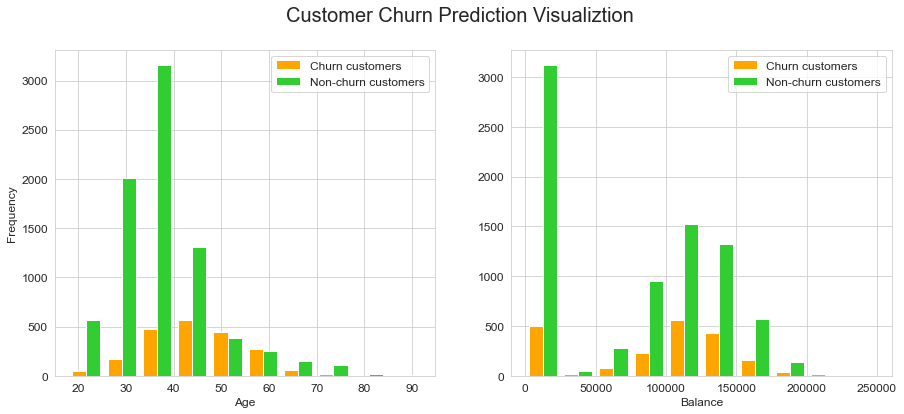

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist([churn['Age'],remained['Age']], label=['Churn customers', 'Non-churn customers'], color=['orange','limegreen'])
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.legend();

plt.subplot(1,2,2)
plt.hist([churn['Balance'],remained['Balance']], label=['Churn customers', 'Non-churn customers'], color=['orange','limegreen'])
plt.xlabel('Balance')
plt.legend()
plt.suptitle("Customer Churn Prediction Visualiztion", fontsize=20);

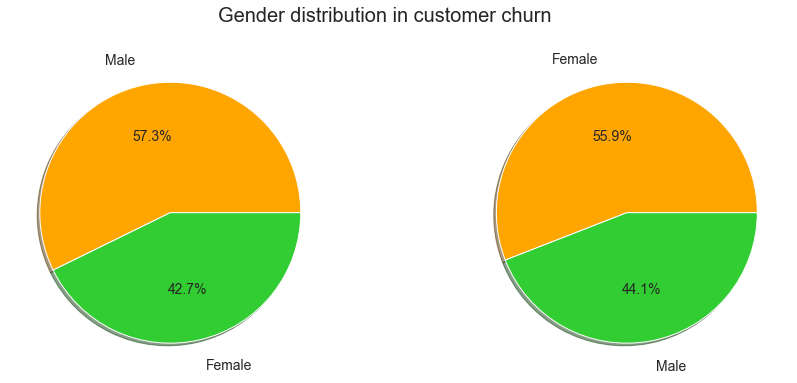

In [10]:
plt.figure(figsize=(15,6))
matplotlib.rcParams['font.size'] = 14.0

for i,data in enumerate([remained, churn]):
    counts = data['Gender'].value_counts(normalize=True)
    plt.subplot(1,2,i+1)
    plt.pie(x=counts.values, labels=counts.index, autopct='%1.1f%%', shadow=True, 
            colors=['orange', 'limegreen'], labeldistance=1.2)

plt.suptitle('Gender distribution in customer churn', fontsize=20);


In [11]:
df.groupby('NumOfProducts').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
NumOfProducts,,,,,,,,,,
1,4973.034225,1.568963e+07,649.120968,39.673092,4.974626,98551.870614,0.703777,0.504131,99487.256851,0.277144
2,5037.120479,1.569211e+07,652.188671,37.753595,5.051852,51879.145813,0.707190,0.532898,100452.012821,0.075817
3,4854.135338,1.569908e+07,648.105263,43.195489,5.003759,75458.328195,0.714286,0.424812,104318.130564,0.827068
4,5175.183333,1.567663e+07,653.583333,45.683333,5.300000,93733.135000,0.683333,0.483333,104763.723333,1.000000


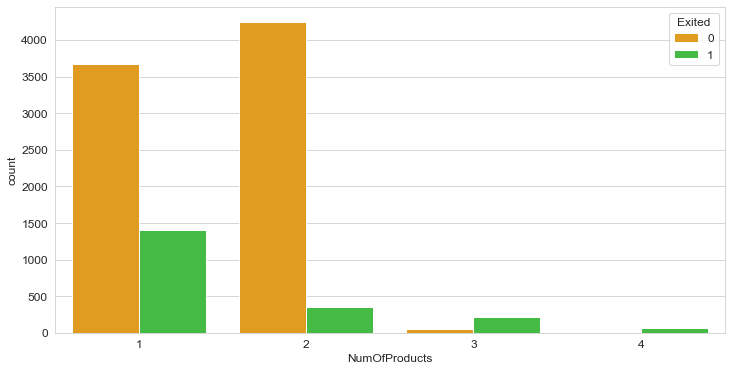

In [12]:
matplotlib.rcParams['font.size'] = 12.0
sns.countplot(data= df, x='NumOfProducts', hue='Exited', palette=['orange', 'limegreen']);
# all customers with 4 number of products left the company
# looks like most of the customers with 2 products stayed 

In [13]:
remained['Geography'].value_counts(normalize=True)
churn['Geography'].value_counts(normalize=True)

Germany    0.399607
France     0.397644
Spain      0.202749
Name: Geography, dtype: float64

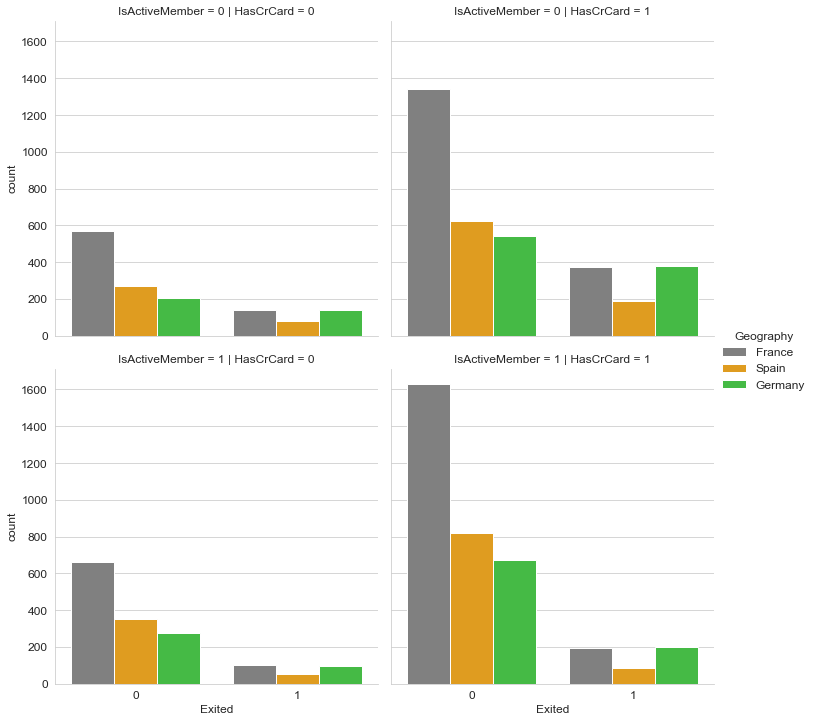

In [14]:
sns.catplot(kind='count',data=df, x='Exited', hue='Geography', col='HasCrCard', row='IsActiveMember',
            palette=['grey', 'Orange', 'Limegreen']);

# Data Preprocessing

In [15]:
df = df.iloc[:,3:]

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df1 = pd.DataFrame()

for i in range(2):
    x = df[df['Exited']==i]
    meu = x['Age'].mean()
    std_ = x['Age'].std()
    df1 = df1.append(x[(x['Age'] >= meu-2*std_) & (x['Age'] <= meu+2*std_)])    

In [18]:
df1.corr()['Age']['Exited']

0.43830599546983684

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df1.iloc[:,2] = LabelEncoder().fit_transform(df1.iloc[:,2])

In [21]:
df1 = pd.get_dummies(df1, drop_first=True)

In [22]:
df1.select_dtypes('object').columns

Index([], dtype='object')

* Train Test Split

In [23]:
df2 = df1.copy()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df2.drop('Exited', axis=1)
y = df2.Exited

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [27]:
X_train.shape, y_test.shape

((7096, 11), (2366,))

* Min Max Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

# Creating a Logistic Regression model

In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
score= []
c_vals = []
penalty_ = []
for penalty in ['l1', 'l2']:
    for c in [0.001,0.01,0.1,1,100,1000]:
        lr = LogisticRegression(C=c, penalty=penalty, solver='liblinear').fit(scaled_train, y_train)
        ypred = lr.predict(scaled_test)
        conf_matrix = confusion_matrix(y_test, ypred)
        recall = conf_matrix[1][1] / conf_matrix[1].sum() 
        penalty_.append(penalty)
        c_vals.append(c)
        score.append(recall)


x=pd.DataFrame([penalty_, c_vals, score]).T
x.columns = ['penalty_', 'c_vals', 'recall_1']

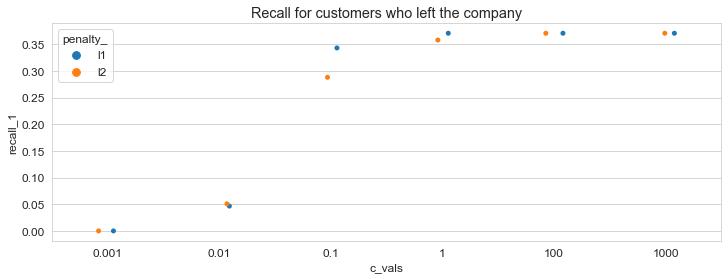

In [33]:
plt.figure(figsize=(12,4))
sns.stripplot(y=x['recall_1'], x=x['c_vals'], hue=x['penalty_'])
plt.title('Recall for customers who left the company');

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

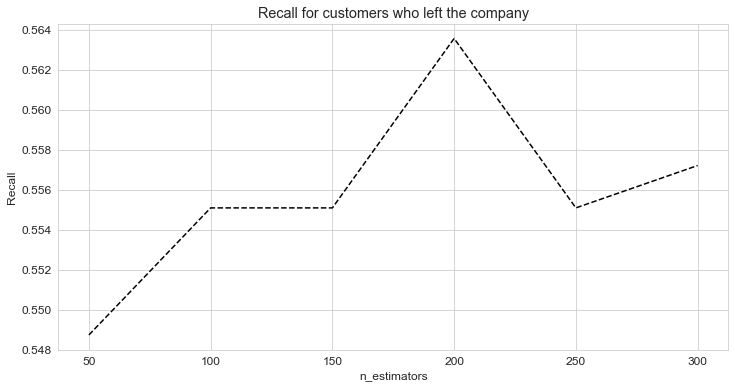

In [36]:
np.random.seed(101)
score = []
for i in range(50,350,50):
    rf = RandomForestClassifier(n_estimators=i).fit(scaled_train, y_train)
    ypred = rf.predict(scaled_test)
    conf_matrix = confusion_matrix(y_test, ypred)
    recall = conf_matrix[1][1] / conf_matrix[1].sum() 
    score.append(recall)
    

plt.plot(range(50,350,50), score, 'k--')
plt.title('Recall for customers who left the company');
plt.ylabel('Recall')
plt.xlabel('n_estimators');

* Predicting probabilities of churn

In [37]:
np.random.seed(101)
rf = RandomForestClassifier(n_estimators=200).fit(scaled_train, y_train)
yprob = rf.predict_proba(scaled_test)
print(yprob)

[[0.88  0.12 ]
 [0.715 0.285]
 [0.92  0.08 ]
 ...
 [0.975 0.025]
 [0.99  0.01 ]
 [0.95  0.05 ]]


In [38]:
ypred = []
for prob in yprob:
    if prob[0] >= 0.67:
        ypred.append(0)
    else:
        ypred.append(1)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1894
           1       0.61      0.71      0.66       472

    accuracy                           0.85      2366
   macro avg       0.77      0.80      0.78      2366
weighted avg       0.86      0.85      0.86      2366



# Support Vector Machine

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [41]:
grid = GridSearchCV(SVC(),param_grid,refit=True).fit(scaled_train, y_train)

In [42]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [43]:
ypred = grid.predict(scaled_test)

In [44]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1894
           1       0.80      0.49      0.61       472

    accuracy                           0.87      2366
   macro avg       0.84      0.73      0.77      2366
weighted avg       0.87      0.87      0.86      2366



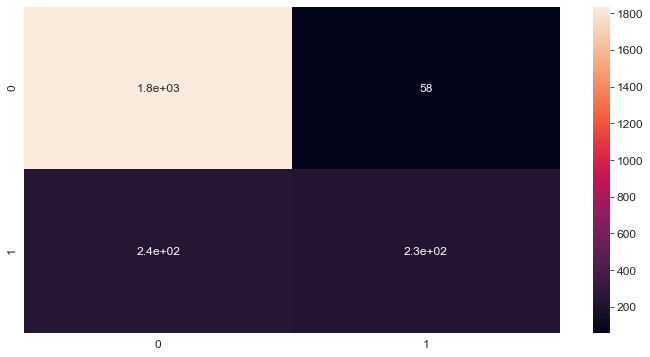

In [45]:
sns.heatmap(confusion_matrix(y_test, ypred), annot=True);

# Oversampling to get better results

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
OSX_train, OSy_train = SMOTE().fit_sample(scaled_train, y_train)

In [48]:
OSX_train.shape, OSy_train.shape

((11240, 11), (11240,))

* Random Forest

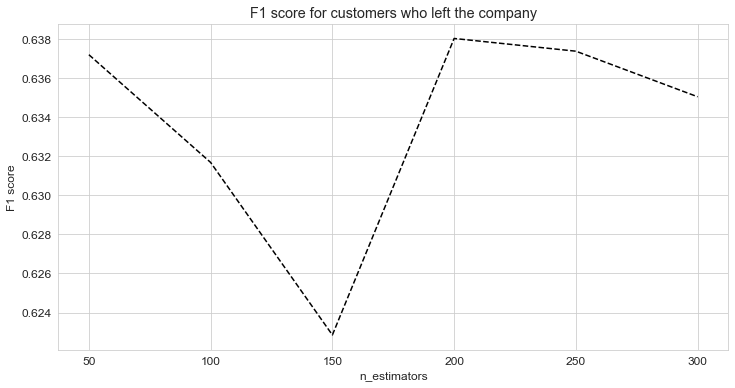

In [49]:
np.random.seed(101)
from sklearn.metrics import f1_score
score = []
for i in range(50,350,50):
    rf = RandomForestClassifier(n_estimators=i).fit(OSX_train, OSy_train)
    ypred = rf.predict(scaled_test)
    f1 = f1_score(y_test, ypred)    
    score.append(f1)
    

plt.plot(range(50,350,50), score, 'k--')
plt.title('F1 score for customers who left the company')
plt.ylabel('F1 score')
plt.xlabel('n_estimators');

* K Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

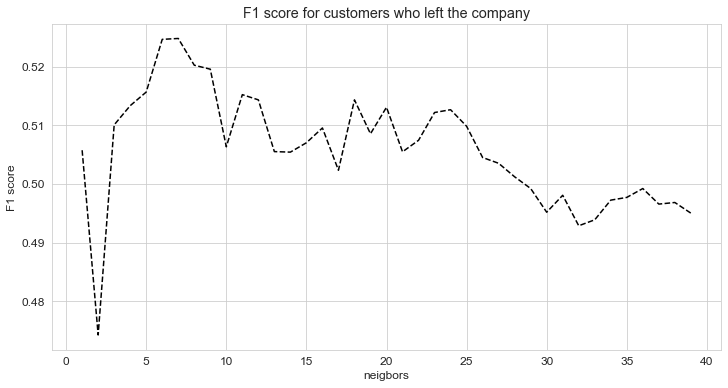

In [51]:
np.random.seed(101)

score = []
for i in range(1,40):
    knn =KNeighborsClassifier(n_neighbors=i).fit(OSX_train, OSy_train)
    ypred = knn.predict(scaled_test)
    f1 = f1_score(y_test, ypred)    
    score.append(f1)
    
plt.plot(range(1,40), score, 'k--')
plt.title('F1 score for customers who left the company')
plt.xlabel('neigbors')
plt.ylabel('F1 score');

* Artificial Neural Network

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [55]:
model = Sequential()
model.add(Dense(units=128, input_shape=(11,) , activation='relu'))
for i in range(4):
    model.add(Dense(units=64 , activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1 , activation='sigmoid'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [56]:
model.fit(OSX_train, OSy_train,batch_size=64, epochs=75, validation_split=0.2)

Epoch 1/75
141/141 [==============================] - 1s 9ms/step - loss: 0.5626 - accuracy: 0.7015 - val_loss: 1.0359 - val_accuracy: 0.4279
Epoch 2/75
141/141 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7741 - val_loss: 0.5813 - val_accuracy: 0.6913
Epoch 3/75
141/141 [==============================] - 1s 4ms/step - loss: 0.4280 - accuracy: 0.8018 - val_loss: 0.6013 - val_accuracy: 0.6748
Epoch 4/75
141/141 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8065 - val_loss: 0.4857 - val_accuracy: 0.7687
Epoch 5/75
141/141 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8088 - val_loss: 0.5785 - val_accuracy: 0.6975
Epoch 6/75
141/141 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8106 - val_loss: 0.4766 - val_accuracy: 0.7687
Epoch 7/75
141/141 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8145 - val_loss: 0.5031 - val_accuracy: 0.7367
Epoch 

In [57]:
ypred = model.predict_classes(scaled_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1894
           1       0.51      0.62      0.56       472

    accuracy                           0.81      2366
   macro avg       0.71      0.74      0.72      2366
weighted avg       0.82      0.81      0.81      2366



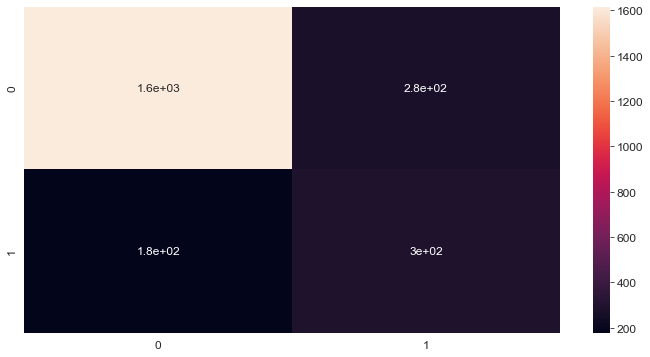

In [58]:
print(classification_report(y_test, ypred))

sns.heatmap(confusion_matrix(y_test, ypred), annot=True);

# Best Performing Model

* Random Forest Classifier

* Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
np.random.seed(101)
rf = RandomForestClassifier(n_estimators=200)
cv = cross_val_score(rf, OSX_train,OSy_train, cv=4)

In [61]:
print('Cross-validation scores (4-fold):', cv)
print('Mean cross-validation score (4-fold): {:.3f}'.format(np.mean(cv)))

Cross-validation scores (4-fold): [0.82989324 0.90569395 0.92597865 0.92206406]
Mean cross-validation score (4-fold): 0.896


In [62]:
rf.fit(OSX_train, OSy_train)

RandomForestClassifier(n_estimators=200)

In [63]:
ypred=[]
for prob in rf.predict_proba(scaled_test):
    if prob[0] >= 0.55:
        ypred.append(0)
    else:
        ypred.append(1)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1894
           1       0.57      0.70      0.63       472

    accuracy                           0.84      2366
   macro avg       0.75      0.78      0.76      2366
weighted avg       0.85      0.84      0.84      2366



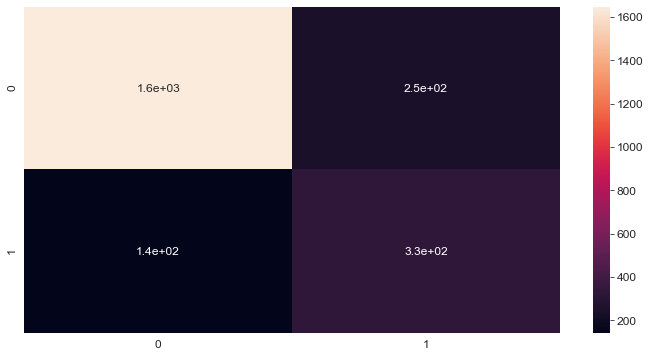

In [64]:
print(classification_report(y_test, ypred))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True);

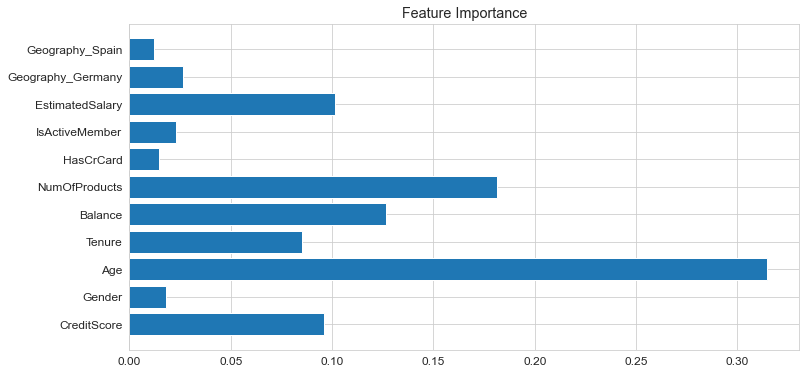

In [65]:
plt.barh(X.columns, rf.feature_importances_)
plt.title('Feature Importance');